# Madhur Jaripatke
### Roll No. 52
### BE A Computer
### RMDSSOE, Warje, Pune
Given a bank customer, build a neural network-based classifier that can determine whether 
they will leave or not in the next 6 months. 
Dataset Description: The case study is from an open-source dataset from Kaggle. 
The dataset contains 10,000 sample points with 14 distinct features such as 
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. 

Link to the Kaggle project: 
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling  
Perform following steps: 
1. Read the dataset. 
2. Distinguish the feature and target set and divide the data set into training and test sets. 
3. Normalize the train and test data.  
4. Initialize and build the model. Identify the points of improvement and implement the same.  
5. Print the accuracy score and confusion matrix (5 points).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

2024-11-06 16:23:11.655811: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-06 16:23:11.656314: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 16:23:11.659166: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 16:23:11.666761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-06 16:23:11.678891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

# Loading the Dataset

In [2]:
df = pd.read_csv('./Datasets/churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

# Exploratory Data Analysis (EDA)

In [5]:
df.isnull()
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Data Preprocessing

In [9]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Visualisation

In [10]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['yellow', 'blue'], label = ['exited', 'not_exited'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel('No. of customers', fontsize=20)
    plt.legend()

In [11]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

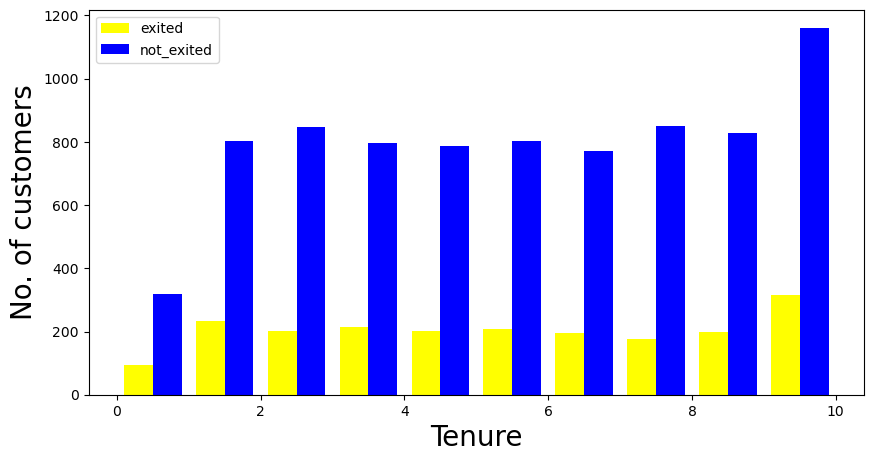

In [12]:
visualization(df_churn_exited, df_churn_not_exited, 'Tenure')

In [13]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

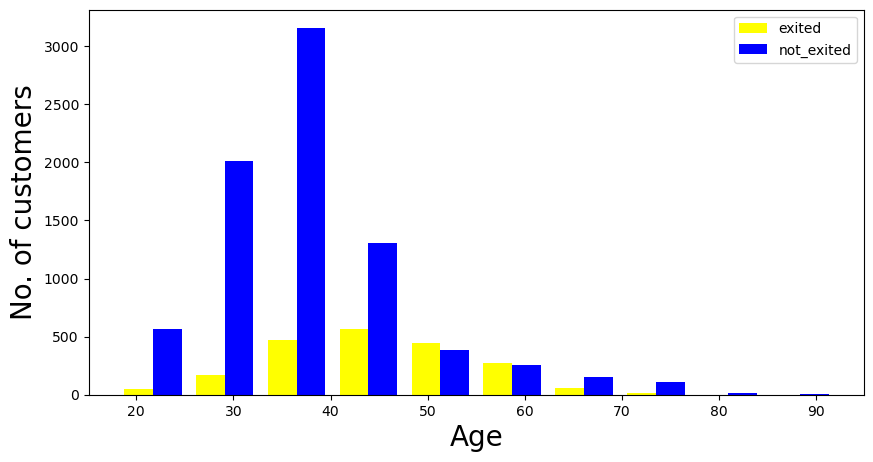

In [14]:
visualization(df_churn_exited2, df_churn_not_exited2, 'Age')

In [15]:
x = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
        'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
states = pd.get_dummies(df['Geography'], drop_first = True)
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [16]:
df = pd.concat([df,gender,states], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [17]:
x = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Male', 'Germany', 'Spain']]
y = df['Exited']

# Splitting the Dataset

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Normalising the Data

In [19]:
sc = StandardScaler()

In [20]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
print('Training Data:\n',x_train)

Training Data:
 [[ 0.96818741 -0.56596928 -1.39661597 ... -1.09823226 -0.57603061
  -0.56789208]
 [ 1.19521436 -0.18753916  0.68426206 ...  0.91055421 -0.57603061
   1.76089794]
 [-0.59004305 -0.37675422 -1.04980297 ...  0.91055421 -0.57603061
  -0.56789208]
 ...
 [ 0.27678714  1.98843404  1.72470107 ... -1.09823226 -0.57603061
  -0.56789208]
 [-0.38365491  1.13696627 -0.70298996 ...  0.91055421 -0.57603061
  -0.56789208]
 [-0.70355653  0.47471356  1.03107506 ... -1.09823226 -0.57603061
  -0.56789208]]


In [22]:
print('Testing Data:\n',x_test)

Testing Data:
 [[-2.04507944e+00 -9.29316256e-02  1.03107506e+00 ... -1.09823226e+00
   1.73601886e+00 -5.67892082e-01]
 [-1.15350332e-01 -1.79586717e+00 -3.56176956e-01 ... -1.09823226e+00
  -5.76030610e-01 -5.67892082e-01]
 [-1.66326138e+00  1.67590482e-03 -1.39661597e+00 ...  9.10554206e-01
  -5.76030610e-01 -5.67892082e-01]
 ...
 [ 1.22617258e+00 -1.41743705e+00  1.37788807e+00 ...  9.10554206e-01
  -5.76030610e-01 -5.67892082e-01]
 [ 3.94407736e-02 -9.29316256e-02  1.37788807e+00 ...  9.10554206e-01
  -5.76030610e-01  1.76089794e+00]
 [ 1.25713080e+00  1.23157380e+00 -1.04980297e+00 ...  9.10554206e-01
  -5.76030610e-01  1.76089794e+00]]


# Building the Neural Network Model

In [23]:
classifier = Sequential()

In [24]:
classifier.add(Input(shape=(10,)))

In [25]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [27]:
classifier.fit(x_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8044 - loss: 0.4926
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8125 - loss: 0.4353
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.8244 - loss: 0.4096
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.8353 - loss: 0.3922
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.8432 - loss: 0.3796
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.8422 - loss: 0.3821
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.8514 - loss: 0.3604
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.8516 - loss: 0.3587
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8466 - loss: 0.3601
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.8532 - loss: 0.3516
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8553 - loss: 0.3512
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━

# Evaluating the Model

In [28]:
y_pred =classifier.predict(x_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[2285  108]
 [ 307  300]]


In [30]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)

Accuracy Score: 0.8616666666666667


Text(95.72222222222221, 0.5, 'Truth')

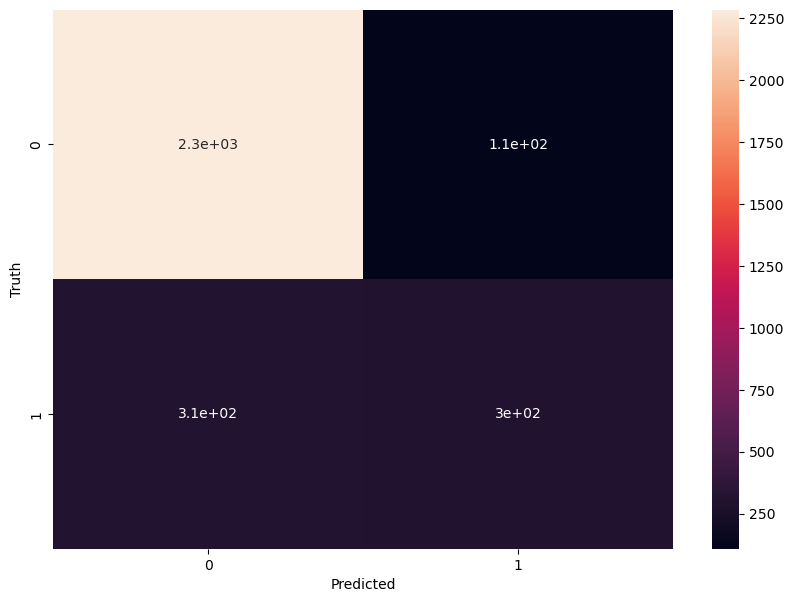

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
print('Classification Report:\n',classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      2393
           1       0.74      0.49      0.59       607

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

